# mobile price range prediction

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is**


**Data Description -**




*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega 
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).









In [3]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset

df = pd.read_csv(r"C:\Users\visha\Downloads\data_mobile_price_range.csv")
#Return the first 5 rows of the DataFrame
df


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,?,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.columns #This one-liner retrieves the column names of the DataFrame 'df'.


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
len(df.columns)  #This one-liner calculates and returns the number of columns in the DataFrame 'df'.


21

There are 21 columns

In [7]:
# The tail () function is used to get the last n rows. 
df.tail

<bound method NDFrame.tail of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width

# Data Analysis

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [9]:
#Description of the data
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,3.000000


In [10]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df[df["three_g"]=="?"] #This one-liner filters rows in the DataFrame 'df' where the value in the "three_g" column is equal to "?".

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,?,1,0,2
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,?,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,?,0,1,0
21,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,?,0,0,3
35,725,0,1.3,1,16,0,60,0.4,160,8,...,1134,1249,1326,10,4,15,?,0,0,1
53,1457,0,1.9,1,1,1,16,0.3,102,3,...,1013,1287,1440,17,8,12,?,0,1,1
72,605,0,1.0,0,8,1,9,0.1,142,3,...,160,1026,392,15,6,4,?,0,0,0
97,1665,1,0.5,0,3,1,60,0.2,194,6,...,1572,1684,1601,18,17,14,?,0,0,2
119,1778,0,0.5,0,0,0,15,0.5,102,3,...,1445,1954,1214,5,0,14,?,0,0,1
135,1213,1,0.5,0,0,0,16,0.5,108,5,...,226,1248,2700,12,3,9,?,0,1,2


In [12]:
df['three_g'] = pd.to_numeric(df['three_g'], errors='coerce') #This one-liner converts the values in the 'three_g' column of the DataFrame 'df' to numeric format, replacing any non-numeric values with NaN (Not a Number).


In [13]:
column_name = 'three_g'
mean_value = df[column_name].mean() #This one-liner calculates the mean value of the 'three_g' column in the DataFrame 'df' and assigns it to the variable 'mean_value'.


In [14]:
nl_mean=df['three_g'].mean()

#  to replace the value with mean value 
df['three_g']=df['three_g'].fillna(nl_mean)

In [16]:
df['three_g'].isnull().sum() #This one-liner counts the number of missing (NaN) values in the 'three_g' column of the DataFrame 'df'.


0

In [17]:
df[df["touch_screen"]=="?"] #This one-liner filters rows in the DataFrame 'df' where the value in the "touch_screen" column is equal to "?".


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
25,961,1,1.4,1,0,1,57,0.6,114,8,...,291,1434,2782,18,9,7,1.0,?,1,2
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0.0,?,1,3
43,1656,0,1.0,0,5,1,34,0.1,166,3,...,880,1456,1629,15,12,14,1.0,?,0,1
64,702,0,2.6,1,2,1,9,0.7,141,3,...,504,1570,2955,10,4,19,1.0,?,0,2
82,1510,1,0.9,1,2,0,45,0.9,180,5,...,708,1752,3484,9,6,11,0.0,?,1,3
108,1135,1,2.0,1,0,0,46,0.3,83,1,...,293,1846,3029,19,17,9,1.0,?,1,3
127,1564,0,2.3,0,4,1,25,0.5,189,6,...,1259,1965,1496,6,4,7,1.0,?,1,1
146,1101,0,1.8,0,0,0,31,0.2,148,2,...,387,1269,2196,12,6,19,0.0,?,1,1
161,961,1,1.5,1,10,0,51,0.3,152,6,...,554,621,2981,15,6,7,1.0,?,1,2
180,703,1,2.7,0,12,1,30,0.3,113,1,...,218,1065,1472,14,7,7,1.0,?,0,0


In [18]:
df['touch_screen'] = pd.to_numeric(df['touch_screen'], errors='coerce') #This one-liner converts the values in the 'touch_screen' column of the DataFrame 'df' to numeric format, replacing any non-numeric values with NaN (Not a Number).


In [19]:
column_name = 'touch_screen'
mean_value = df[column_name].mean() #This one-liner calculates the mean value of the 'touch_screen' column in the DataFrame 'df' and assigns it to the variable 'mean_value'.


In [20]:
nl_mean=df['touch_screen'].mean()

#  to replace the value with mean value 
df['touch_screen']=df['touch_screen'].fillna(nl_mean)

In [21]:
df['touch_screen'].isnull().sum() #Tone-liner calculates the number of missing (NaN) values in the 'touch_screen' column of the DataFrame 'df'.


0

there are no missing values in the data set

# Exploratory Data Analysis

**price**

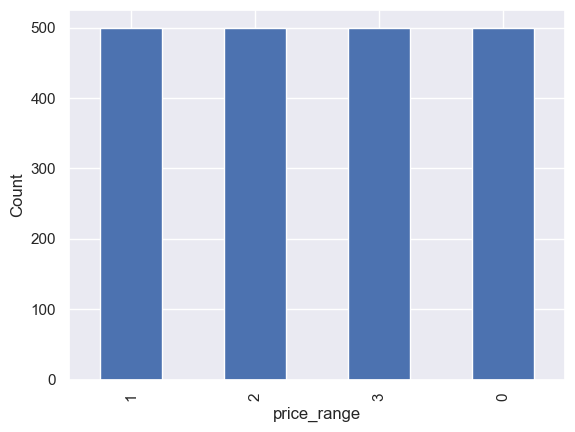

In [22]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

there are mobile phones in 4 price ranges. The number of elements is almost similar.

**Battery power**

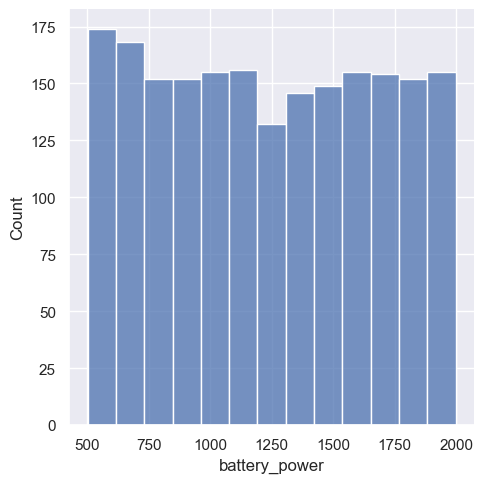

In [23]:
sns.set(rc={'figure.figsize':(5,5)}) #This one-liner sets the Seaborn plotting style with a specific figure size, creates a distribution plot (histogram) for the 'battery_power' column in the DataFrame 'df', and displays the plot using Matplotlib.
ax=sns.displot(df["battery_power"])
plt.show()

this plot shows how the battery mAh is spread.
 there is a gradual increase as the price range increases

**Bluetooth**

<Axes: xlabel='blue', ylabel='price_range'>

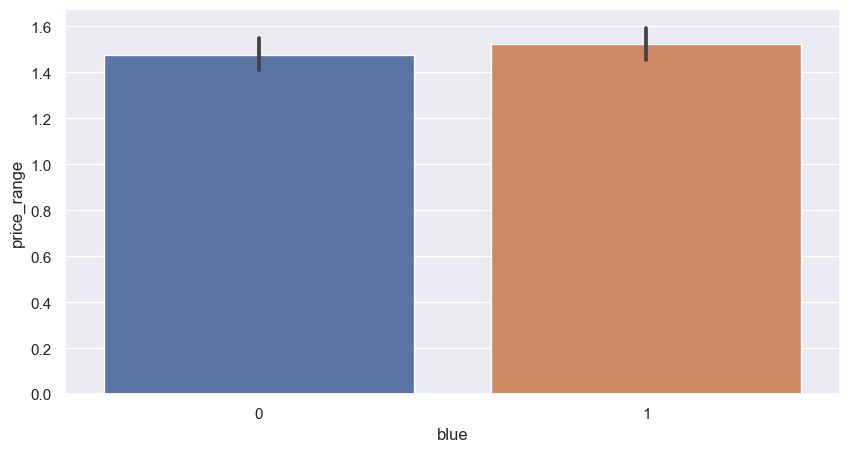

In [24]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

 half the devices have Bluetooth, and half don’t.

**ram**

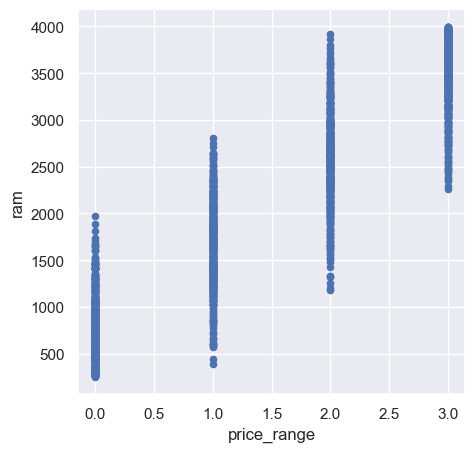

In [25]:

df.plot(x='price_range',y='ram',kind='scatter') #This one-liner creates and displays a scatter plot using the 'price_range' column as the x-axis and the 'ram' column as the y-axis in the DataFrame 'df'.
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost

**pixel_width**

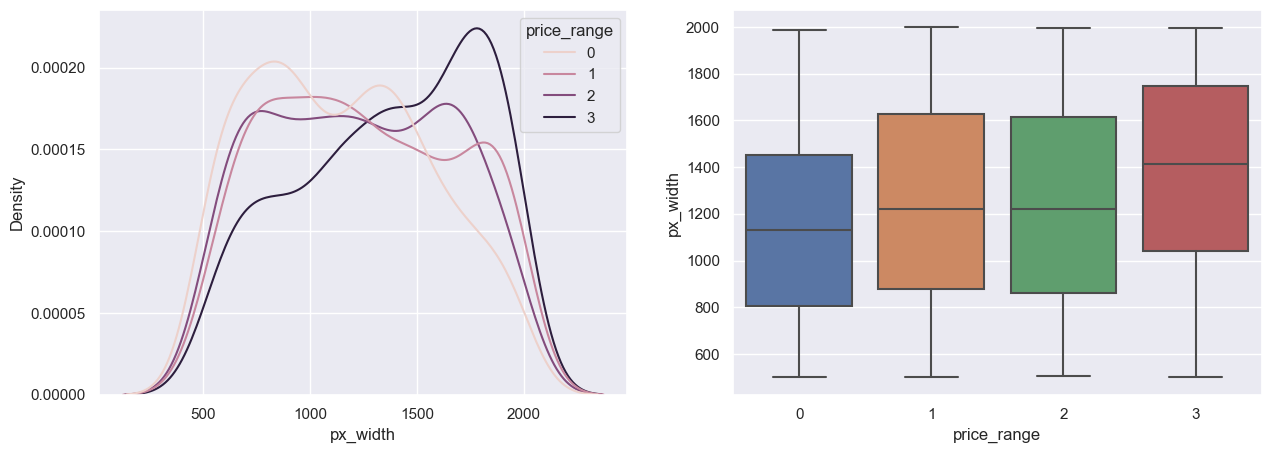

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,5)) #This one-liner creates a figure with two subplots, where the first subplot is a kernel density plot (kdeplot) of the 'px_width' column colored by 'price_range', and the second subplot is a boxplot of 'px_width' against 'price_range' in the DataFrame 'df'. The figure has a specified size of (15,5), and the plot is displayed using Matplotlib and Seaborn.
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show() 

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width.
so we can say that it would be a driving factor in deciding price_range.


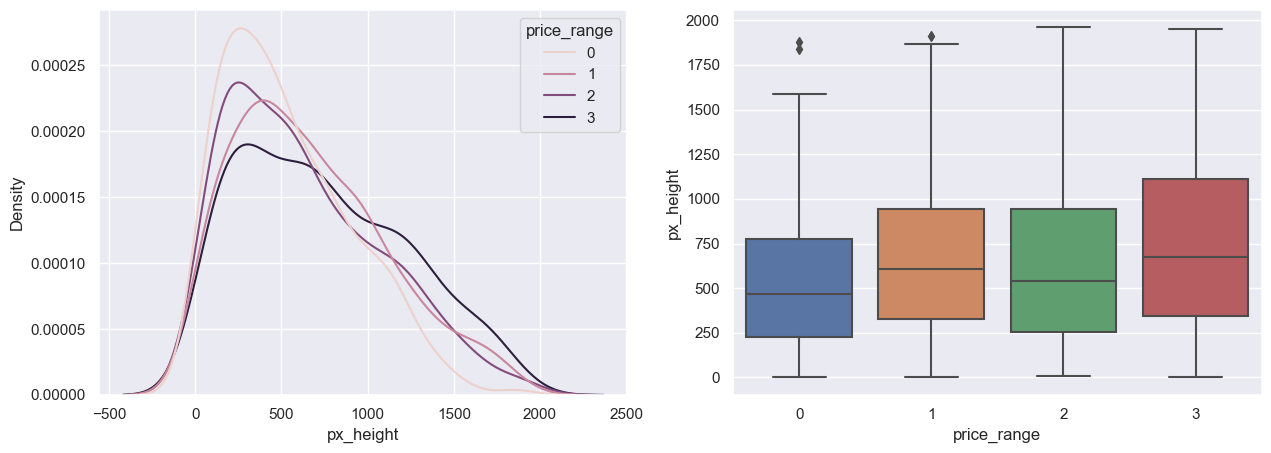

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,5)) #This one-liner creates a figure with two subplots, where the first subplot is a kernel density plot (kdeplot) of the 'px_height' column colored by 'price_range', and the second subplot is a boxplot of 'px_height' against 'price_range' in the DataFrame 'df'. The figure has a specified size of (15,5), and the plot is displayed using Matplotlib and Seaborn.
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

**FC (front camera megapixels)**

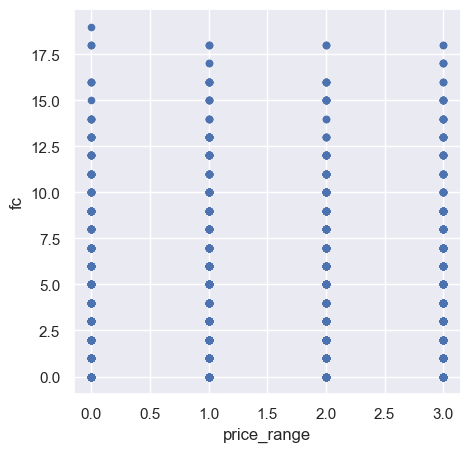

In [15]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

**PC (Primary camera Megapixels)**

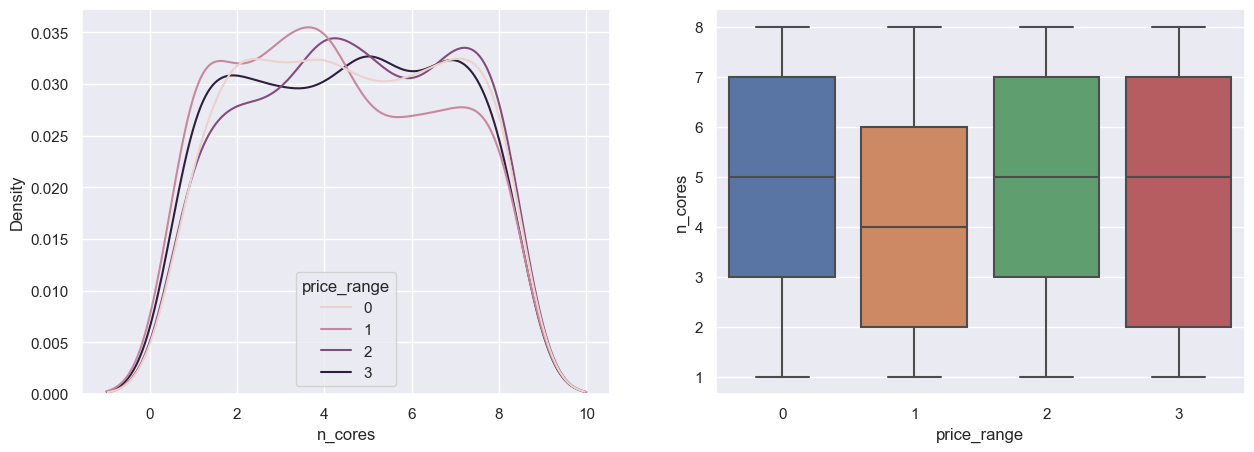

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.



**mobile weight**

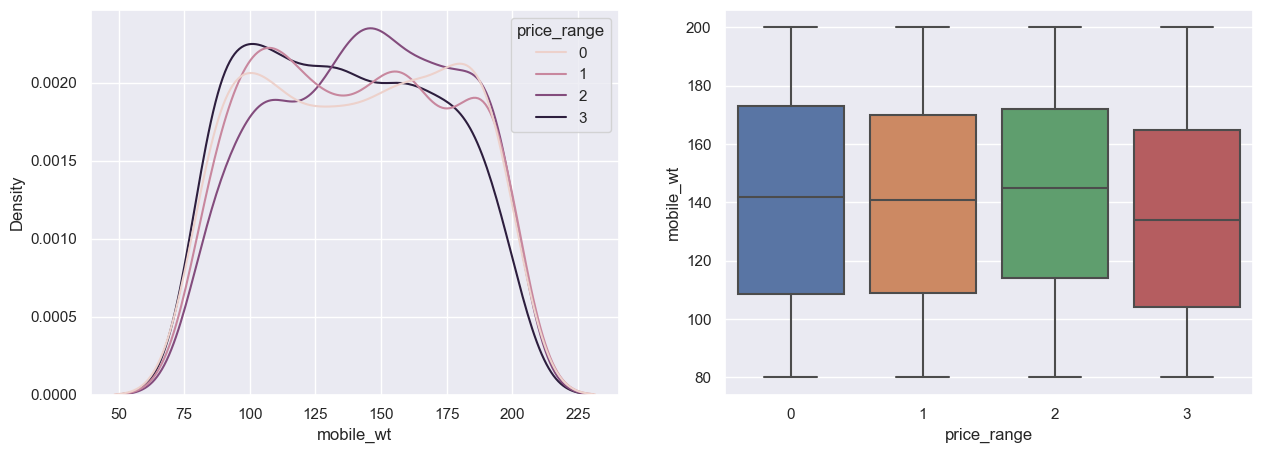

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

costly phones are lighter

In [18]:
binary_features = [ 'four_g', 'three_g']


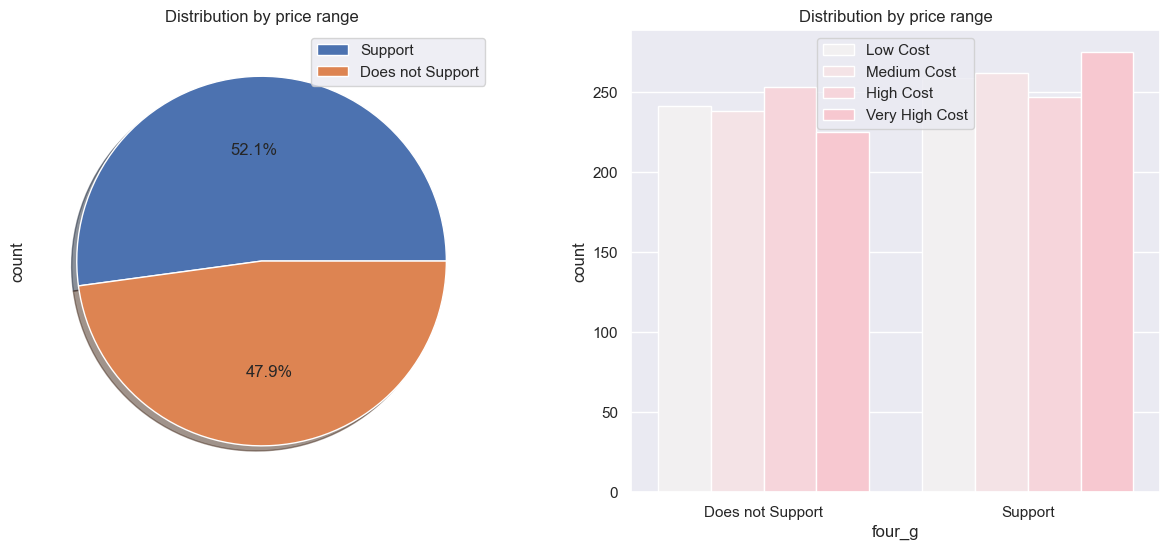

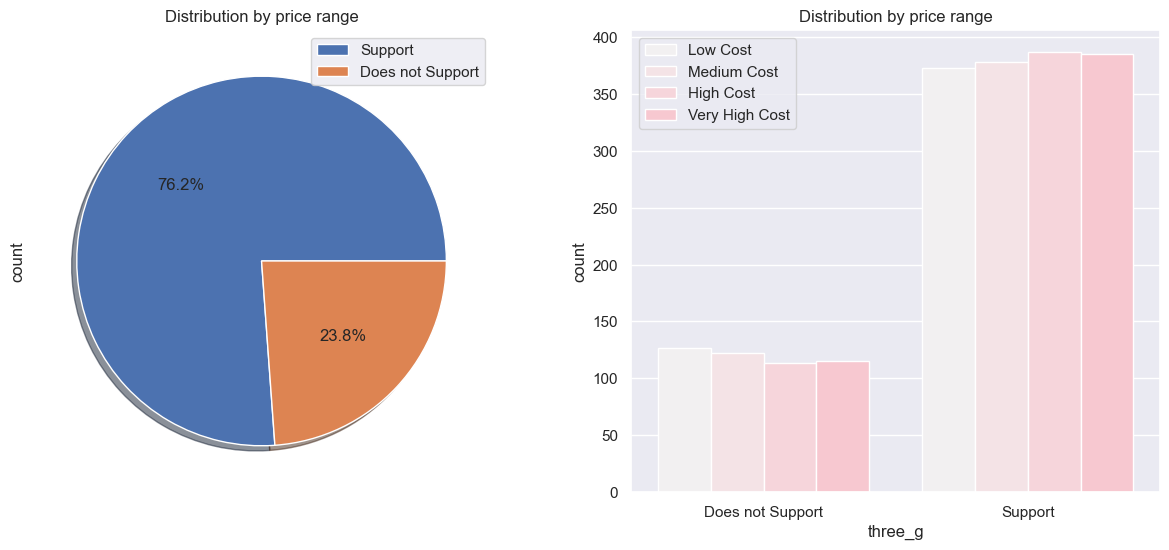

In [19]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

feature 'three_g' play an important feature in prediction

<Axes: >

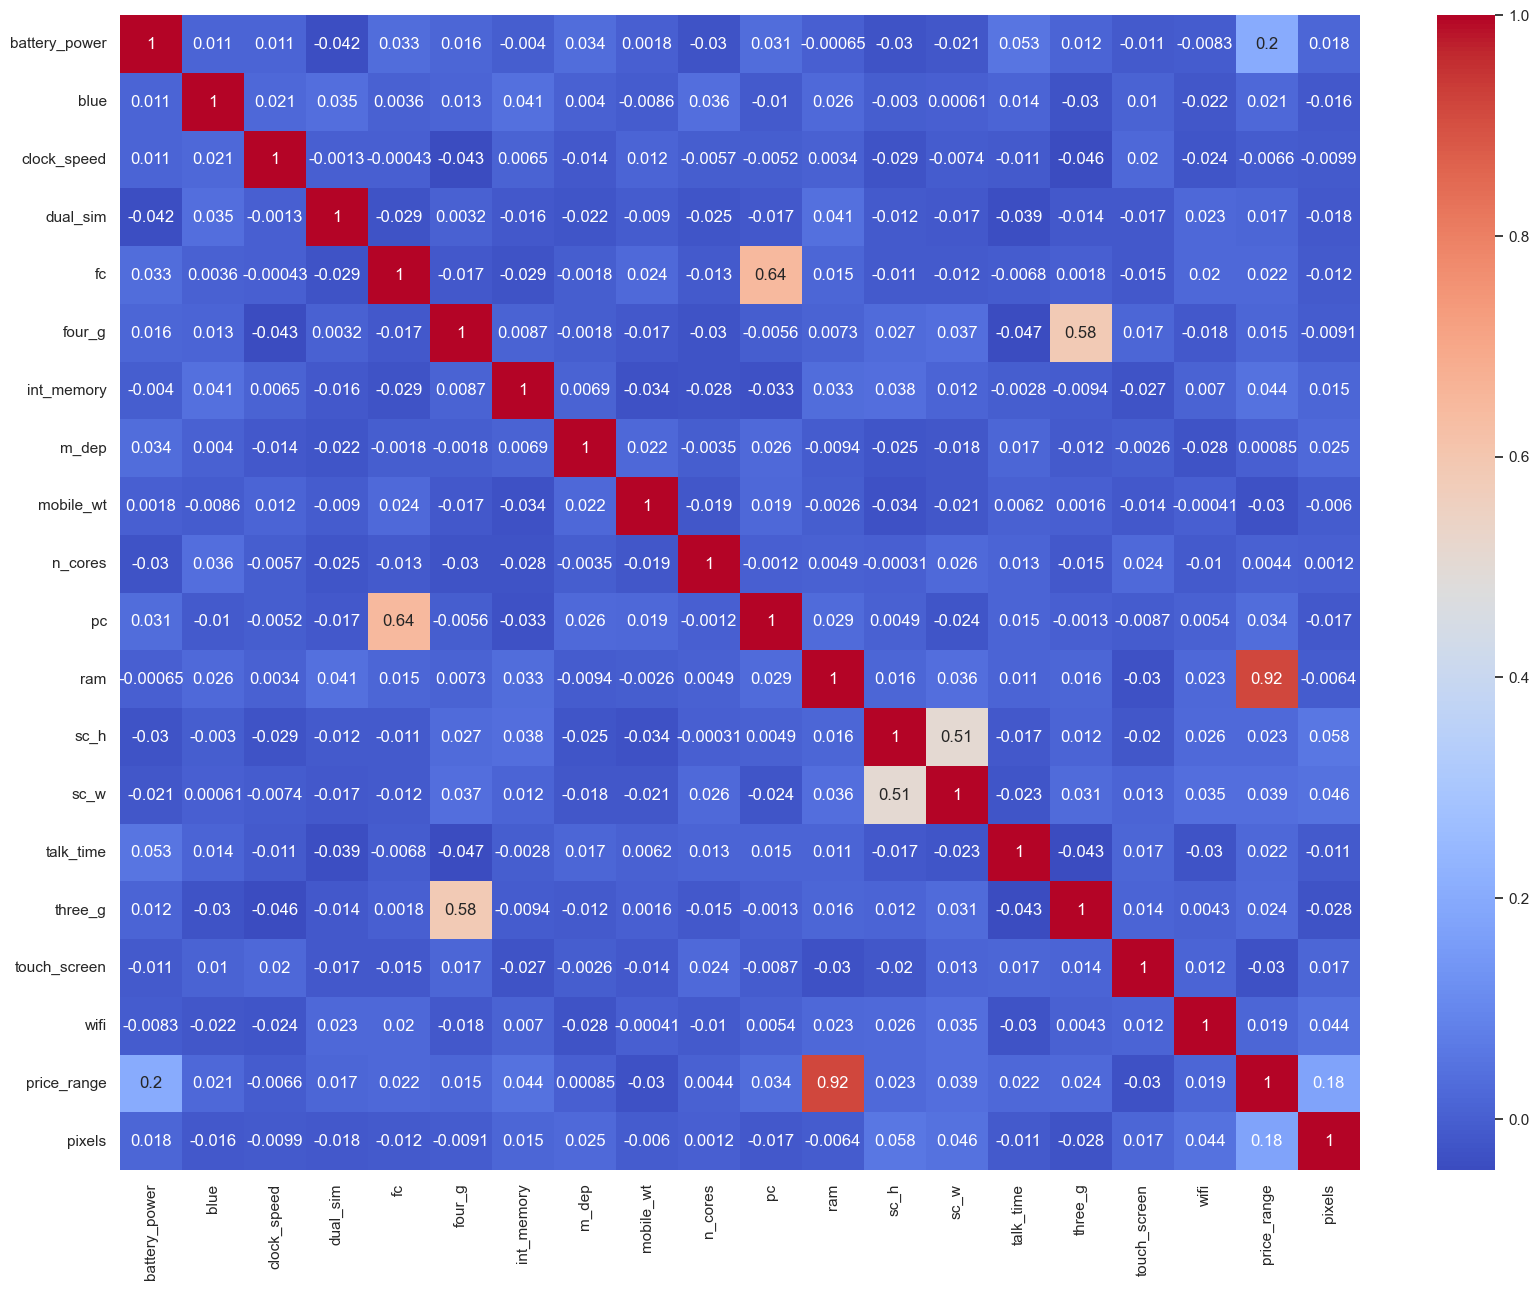

In [20]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

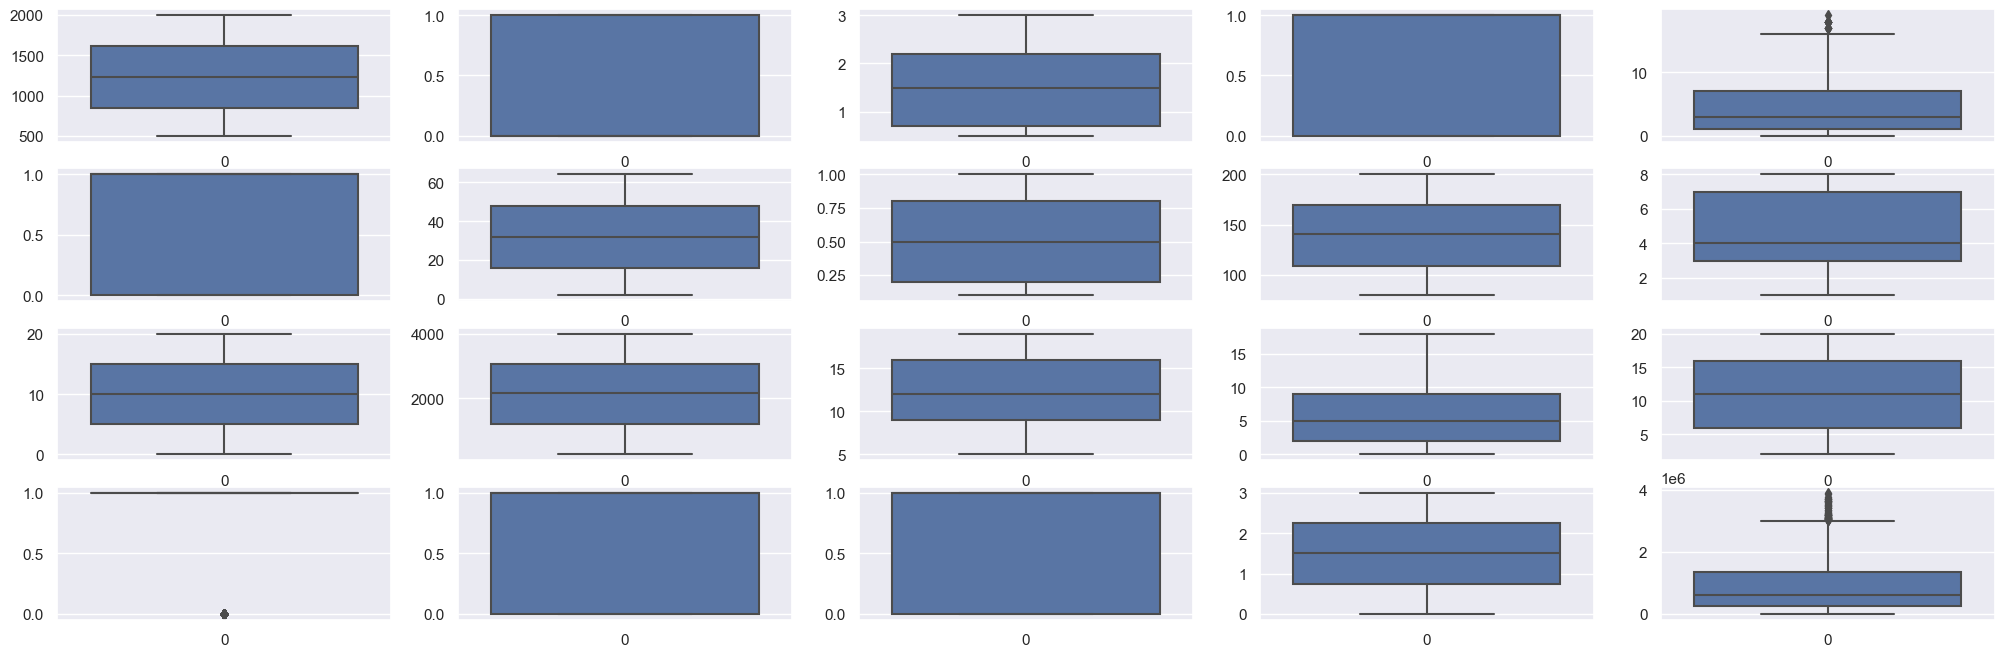

In [21]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

there are no much outliers

In [22]:
df_num=df.select_dtypes(['int','float'])
df_num

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,13,4,19,1,1,0,0,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,11,10,16,1,1,1,2,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,9,1,5,1,1,0,3,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,18,10,19,1,1,1,0,225120


In [23]:
df_cat=df.select_dtypes(['object'])
df_cat

""
0
1
2
3
4
...
1995
1996
1997
1998


In [24]:
from sklearn.preprocessing import StandardScaler
#feature scaling

In [25]:
sc=StandardScaler()


In [26]:
x_scaled=sc.fit_transform(df_num)
x_scaled   # Feature scaling on the numeric column

array([[-0.90259726, -0.9900495 ,  0.83077942, ...,  0.98609664,
        -0.4472136 , -1.07303316],
       [-0.49513857,  1.0100505 , -1.2530642 , ..., -1.01409939,
         0.4472136 ,  1.07754147],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ..., -1.01409939,
         0.4472136 ,  1.52135531],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ..., -1.01409939,
         1.34164079,  0.61637375],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.98609664,
        -1.34164079, -0.81988539],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.98609664,
         1.34164079, -0.65225095]])

In [27]:
df_scaled=pd.DataFrame(data=x_scaled,columns=df_num.columns)
print(df_scaled)  

      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1         -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2         -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3         -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4          1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   
...             ...       ...          ...       ...       ...       ...   
1995      -1.011860  1.010051    -1.253064  0.981177 -0.992890  0.957886   
1996       1.653694  1.010051     1.321096  0.981177 -0.992890 -1.043966   
1997       1.530773 -0.990050    -0.762748  0.981177 -0.762495  0.957886   
1998       0.622527 -0.990050    -0.762748 -1.019184 -0.071307  0.957886   
1999      -1.658331  1.010051     0.585621  0.981177  0.159088  0.957886   

      int_memory     m_dep  mobile_wt   n_cores        pc       ram      sc_h  \
0     

In [28]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,13,4,19,1,1,0,0,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,11,10,16,1,1,1,2,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,9,1,5,1,1,0,3,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,18,10,19,1,1,1,0,225120


#                                         Splitting the X and Y 


In [29]:
# Defining X and y

x = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [30]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,pixels
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,13,4,19,1,1,0,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,11,10,16,1,1,1,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,9,1,5,1,1,0,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,18,10,19,1,1,1,225120


In [31]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# Importing the models and Traning them all at once

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [35]:
def mymodel(model):
    model.fit(x_train,y_train
             )
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [36]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       151
           1       0.30      0.28      0.29       146
           2       0.38      0.18      0.24       148
           3       0.48      0.79      0.60       155

    accuracy                           0.48       600
   macro avg       0.46      0.47      0.45       600
weighted avg       0.46      0.48      0.45       600



LogisticRegression()

In [37]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       151
           1       0.74      0.83      0.78       146
           2       0.76      0.72      0.74       148
           3       0.87      0.87      0.87       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



DecisionTreeClassifier()

In [38]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.28      0.60      0.38       151
           1       0.20      0.16      0.18       146
           2       0.00      0.00      0.00       148
           3       0.37      0.39      0.38       155

    accuracy                           0.29       600
   macro avg       0.21      0.29      0.23       600
weighted avg       0.22      0.29      0.24       600



SVC()

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [40]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       151
           1       0.81      0.85      0.83       146
           2       0.79      0.78      0.78       148
           3       0.91      0.88      0.90       155

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



RandomForestClassifier(random_state=42)

#                                  Gridsearch using random forest

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid=param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [44]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
print("Best Parameters: ", gs.best_params_)
print("Best Score: ", gs.best_score_)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score:  0.8635714285714287


In [46]:
best_rf_model = gs.best_estimator_


In [47]:
y_pred = best_rf_model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8666666666666667


In [49]:
y_pred=rf.predict(x_test)
y_pred

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 3, 3, 2, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 0, 0, 1, 3, 3,

In [50]:
rf.predict([[842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0]])

array([0], dtype=int64)

  #                               Gridsearch using logisticregression

In [51]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    # C is the Regularization Parameter #Techinque to convert overfit to good fit is Regularization 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [52]:
    grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


    #estimator:This is the machine learning model for which you want to perform hyperparameter tuning. In your case, 
    #It's referred to as logreg, which suggests it's a logistic regression model. 

    #

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [54]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.8307142857142858


In [55]:
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(x_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8183333333333334


In [57]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state)]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}

classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid]

In [58]:
from sklearn.model_selection import StratifiedKFold

cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8392857142857142
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8957142857142857
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.47000000000000003


# Model Comparison and Conclusions

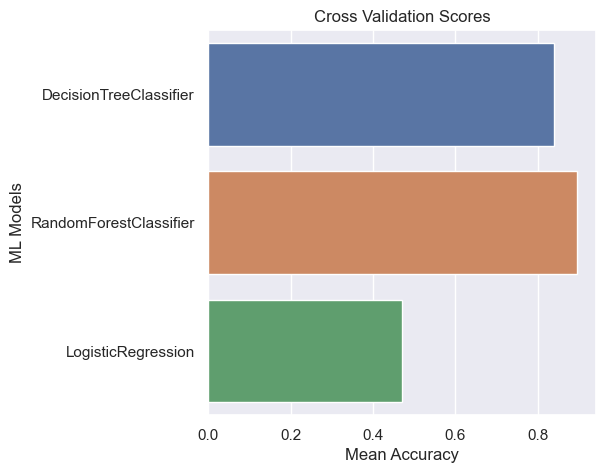

In [59]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [0.8392857142857142, 0.8957142857142857, 0.47000000000000003],
    "ML Models": ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression"]
})

# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()
